In [10]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Parallelize code with `dask.delayed`

## Basics

First let's make some toy functions, `inc` and `add`, that sleep for a while to simulate work. We'll then time running these functions normally.

In the next section we'll parallelize this code.

In [11]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

## Python Normal

In [12]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
total_s = add(x, y)
total_s

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 3 s


### Parallelize with the `dask.delayed` decorator

Those two increment calls *could* be called in parallel, because they are totally independent of ane-another.

We'll transform the `inc` and `add` functions using the `dask.delayed` function. When we call the delayed version by passing the arguments, exactly as before, but the original function isn't actually called yet - which is why the cell execution finishes very quickly.
Instead, a *delayed object* is made, which keeps track of the function to call and the arguments to pass to it.


In [13]:
from dask import delayed

In [14]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
total_d = delayed(add)(x, y)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.57 ms


In [15]:
%%time
# This actually runs our computation using a local thread pool

total_d.compute()

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 2.01 s


5

## What just happened?

The `total_d` object is a lazy `Delayed` object.  This object holds everything we need to compute the final result, including references to all of the functions that are required and their inputs and relationship to one-another.  We can evaluate the result with `.compute()` as above or we can visualize the task graph for this value with `.visualize()`.

In [16]:
total_d

Delayed('add-e49333db-065c-4595-b8ce-4da0ef00c92c')

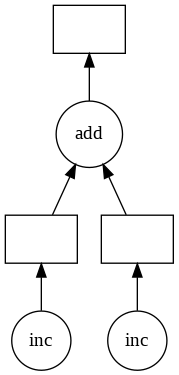

In [17]:
total_d.visualize()

In [20]:
from dask.diagnostics import (Profiler, ResourceProfiler, visualize, ProgressBar)
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [21]:
with Profiler() as prof:
    print(total_d.compute())
visualize([prof], save=False);

5
